In [1]:
import sys
sys.path.append('./Modeling/')

In [3]:
from clustering import *

In [4]:
df_bus_not_daram = get_not_daram_station()

# numerical data만 추출
df_bus_not_daram_num = df_bus_not_daram.select_dtypes(include=['int','float'])
df_bus_not_daram_num = df_bus_not_daram_num.drop(['RIDE_SUM_6_10','ALIGHT_SUM_6_10'],axis=1)
df_bus_not_daram_num

,academy_cnt,kindergarten_cnt,mart_cnt,restaurant_cnt,school_cnt,university_cnt,subway_cnt,tour_cnt,cafe_cnt,hospital_cnt,culture_cnt,univ_hospital_cnt,public_office_cnt,employee_cnt,alone_ratio,emp_corp_ratio,population_15to64
0,185,8,0,1495,0,0,5,16,406,62,68,0,10,4091,0.401961,6.382215,149
1,2,4,0,199,3,0,0,26,88,12,19,0,1,5952,0.280998,10.553191,1943
2,49,2,1,567,3,0,1,20,218,32,146,0,2,1495,0.278683,4.018817,2336
3,166,10,0,1403,1,0,3,13,356,73,50,0,7,4091,0.401961,6.382215,149
4,72,8,3,596,4,1,2,4,237,36,145,0,4,1495,0.278683,4.018817,2336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12543,85,20,0,188,2,0,0,1,53,23,0,0,2,12523,0.059752,3.497068,29747
12544,91,22,0,173,2,0,0,1,51,21,0,0,2,12523,0.059752,3.497068,29747
12545,23,7,0,54,5,0,1,0,7,14,0,0,1,10704,0.093701,5.314796,18569
12546,23,7,0,51,5,0,1,1,7,14,0,0,1,10704,0.093701,5.314796,18569


In [5]:
df_daram_14 = get_daram_14_station_df()
# daram_14_lst = df_daram_14['NODE_ID'].tolist()
df_daram_14_num = df_daram_14.select_dtypes(include=['int','float'])
df_daram_14_num = df_daram_14_num.drop(['RIDE_SUM_6_10','ALIGHT_SUM_6_10'],axis=1)
df_daram_14_num

,academy_cnt,kindergarten_cnt,mart_cnt,restaurant_cnt,school_cnt,university_cnt,subway_cnt,tour_cnt,cafe_cnt,hospital_cnt,culture_cnt,univ_hospital_cnt,public_office_cnt,employee_cnt,alone_ratio,emp_corp_ratio,population_15to64
5,42,10,1,333,1,0,1,2,49,55,0,0,4,18996,0.129167,3.160732,40211
6,79,17,3,277,4,0,0,1,42,27,0,0,5,36170,0.127863,3.528780,48942
20,63,17,0,167,9,0,0,0,36,12,0,0,3,6242,0.088836,3.893949,22444
25,42,16,1,116,1,0,1,0,25,33,0,0,2,17706,0.136672,3.028738,53938
30,147,8,3,805,3,0,2,3,255,88,26,0,2,23823,0.328415,4.544639,10025
33,11,6,2,387,0,0,1,3,102,16,5,1,0,171415,0.087500,11.216057,20914
35,157,7,1,546,1,0,2,1,117,19,1,0,4,11158,0.219602,3.387371,19690
54,55,4,1,1005,1,1,2,2,190,84,4,0,4,61140,0.288663,3.375476,182596
62,12,10,0,54,4,1,0,1,8,4,0,0,2,61140,0.288663,3.375476,182596
67,98,23,2,546,3,0,1,1,98,52,1,0,4,61570,0.258852,3.828980,170048


# 코사인 유사도
- df_bus_not_daram 과df_daram_14 간의 유사도

In [6]:
# df_similar = 코사인 유사도 바탕으로 뽑힌 1400개 정류장
df_similar = get_cosine_similarity(df_daram_14_num,df_bus_not_daram_num,100)

In [7]:
get_clustering_folium(df_similar, 'X좌표','Y좌표')

# kmeans

In [8]:
df_similar_num = df_similar.select_dtypes(include=['int','float']).drop(['RIDE_SUM_6_10','ALIGHT_SUM_6_10'],axis=1)
df_similar_num = df_similar_num.reset_index(drop=True)

df_similar_num

,academy_cnt,kindergarten_cnt,mart_cnt,restaurant_cnt,school_cnt,university_cnt,subway_cnt,tour_cnt,cafe_cnt,hospital_cnt,culture_cnt,univ_hospital_cnt,public_office_cnt,employee_cnt,alone_ratio,emp_corp_ratio,population_15to64
0,44,9,1,333,1,0,1,1,52,55,0,0,3,18996,0.129167,3.160732,40211
1,45,13,1,335,2,0,1,1,55,52,0,0,6,18996,0.129167,3.160732,40211
2,47,10,1,345,1,0,1,1,55,55,0,0,3,18996,0.129167,3.160732,40211
3,47,13,1,347,1,0,1,2,55,59,0,0,4,18996,0.129167,3.160732,40211
4,47,8,1,350,1,0,1,2,55,57,0,0,3,18996,0.129167,3.160732,40211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,52,15,1,86,5,0,0,0,30,12,2,0,0,4630,0.197213,3.683373,16458
1396,188,15,3,262,6,0,1,0,66,64,0,0,3,6242,0.088836,3.893949,22444
1397,112,22,2,221,1,0,1,0,64,42,0,0,1,4630,0.197213,3.683373,16458
1398,159,14,2,246,5,0,1,0,68,56,0,0,1,8796,0.122771,2.643029,32310


In [9]:
# 어떤 스케일러가 데이터에 가장 맞을까..?
df_minmax = scaler(df_similar_num, 'minmax')
df_robust = scaler(df_similar_num, 'robust')
df_standard = scaler(df_similar_num, 'standard')


In [10]:
# kmeans에서는 왜 standard scaler를 선택했는지 생각해야할 것.

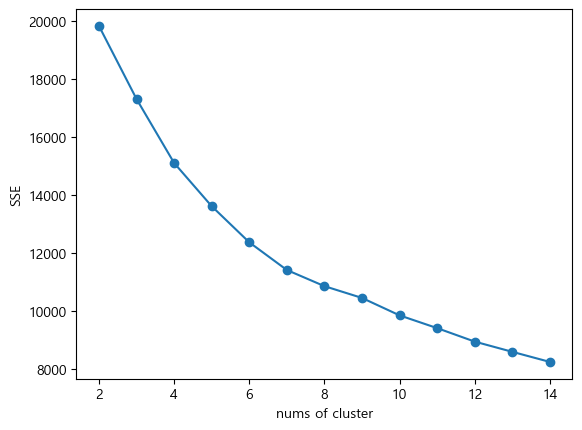

calinski-score 2 개 군집: 279.8466381674948
calinski-score 3 개 군집: 261.70274301423484
calinski-score 4 개 군집: 267.62741636502807
calinski-score 5 개 군집: 260.6396884333978
calinski-score 6 개 군집: 257.33673847029127
calinski-score 7 개 군집: 251.57997208291374
calinski-score 8 개 군집: 236.70530017525195
calinski-score 9 개 군집: 221.7514312616677
calinski-score 10 개 군집: 218.3694101796956
calinski-score 11 개 군집: 212.03825910244473
calinski-score 12 개 군집: 209.16266907202166
calinski-score 13 개 군집: 204.15993792348112
calinski-score 14 개 군집: 200.7481268912541


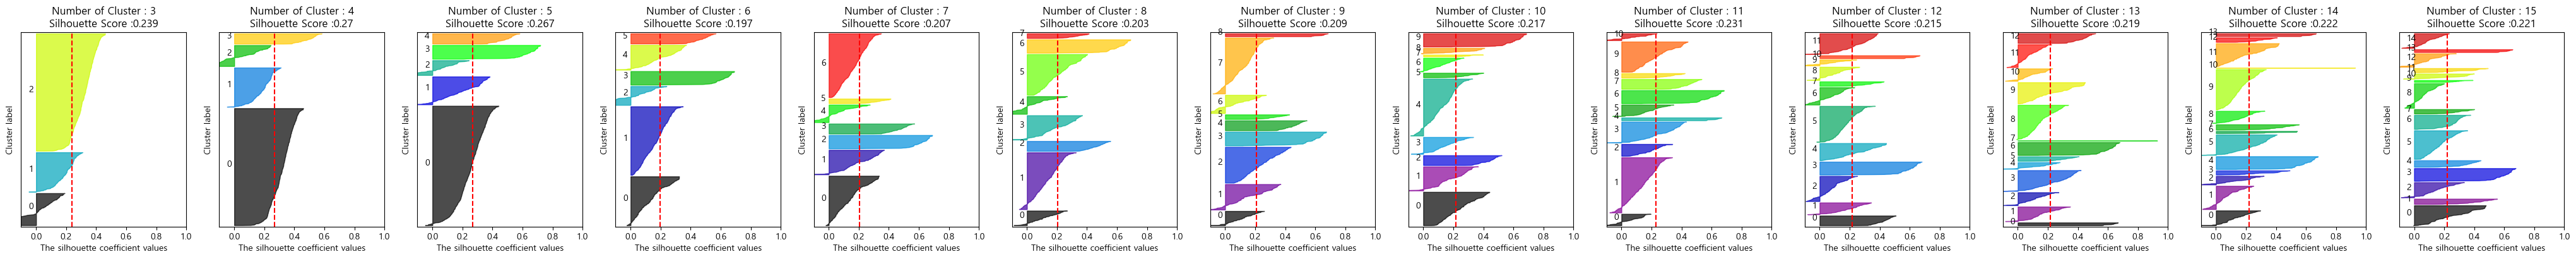

In [11]:
elbow_method(2, 15, df_standard)
visualize_silhouette([3,4,5,6,7,8,9,10,11,12,13,14,15],df_standard)
calinski_harabasz(2,15, df_standard)

In [12]:
df_kmeans = clustering_kmeans(df_standard,8,'k-means++',300,0)
kmeans_lst = df_kmeans['kmeans_label']

In [13]:
df_kmeans

,academy_cnt,kindergarten_cnt,mart_cnt,restaurant_cnt,school_cnt,university_cnt,subway_cnt,tour_cnt,cafe_cnt,hospital_cnt,culture_cnt,univ_hospital_cnt,public_office_cnt,employee_cnt,alone_ratio,emp_corp_ratio,population_15to64,kmeans_label
0,-0.318546,-0.457838,-0.200604,0.143140,-0.810270,-0.47305,0.308599,-0.10018,-0.318809,0.457159,-0.546397,-0.242902,0.486234,-0.461006,-0.444244,-0.657624,-0.283557,5
1,-0.293331,0.162208,-0.200604,0.152173,-0.246744,-0.47305,0.308599,-0.10018,-0.261253,0.378632,-0.546397,-0.242902,2.407383,-0.461006,-0.444244,-0.657624,-0.283557,1
2,-0.242903,-0.302826,-0.200604,0.197343,-0.810270,-0.47305,0.308599,-0.10018,-0.261253,0.457159,-0.546397,-0.242902,0.486234,-0.461006,-0.444244,-0.657624,-0.283557,1
3,-0.242903,0.162208,-0.200604,0.206377,-0.810270,-0.47305,0.308599,0.40798,-0.261253,0.561862,-0.546397,-0.242902,1.126617,-0.461006,-0.444244,-0.657624,-0.283557,1
4,-0.242903,-0.612849,-0.200604,0.219928,-0.810270,-0.47305,0.308599,0.40798,-0.261253,0.509510,-0.546397,-0.242902,0.486234,-0.461006,-0.444244,-0.657624,-0.283557,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,-0.116832,0.472231,-0.200604,-0.972552,1.443834,-0.47305,-0.819439,-0.60834,-0.740892,-0.668397,-0.187768,-0.242902,-1.434916,-0.795382,0.404070,-0.466760,-0.674039,5
1396,3.312301,0.472231,1.659299,-0.177565,2.007360,-0.47305,0.308599,-0.60834,-0.050211,0.692740,-0.546397,-0.242902,0.486234,-0.757862,-0.947038,-0.389860,-0.575633,1
1397,1.396021,1.557312,0.729347,-0.362761,-0.810270,-0.47305,0.308599,-0.60834,-0.088583,0.116875,-0.546397,-0.242902,-0.794533,-0.795382,0.404070,-0.466760,-0.674039,1
1398,2.581089,0.317220,0.729347,-0.249837,1.443834,-0.47305,0.308599,-0.60834,-0.011840,0.483335,-0.546397,-0.242902,-0.794533,-0.698417,-0.523979,-0.846686,-0.413444,1


In [14]:
# del df_similar['kmeans_lst']
df_kmeans_standard = df_similar[::]
df_kmeans_standard['kmeans_label'] = df_kmeans['kmeans_label'].values
df_kmeans_standard


,NODE_ID,정류소명,X좌표,Y좌표,법정동코드,법정동_구,법정동,academy_cnt,kindergarten_cnt,mart_cnt,...,culture_cnt,univ_hospital_cnt,public_office_cnt,employee_cnt,alone_ratio,emp_corp_ratio,population_15to64,RIDE_SUM_6_10,ALIGHT_SUM_6_10,kmeans_label
1917,105000001,답십리역사거리,127.0550605,37.56518709,1123010500,동대문구,답십리동,44,9,1,...,0,0,3,18996,0.129167,3.160732,40211,376765,130596,5
2275,105900047,부속상가,127.0566147,37.5651431,1123010500,동대문구,답십리동,45,13,1,...,0,0,6,18996,0.129167,3.160732,40211,424,5391,1
2024,105000114,답십리역사거리,127.0552011,37.56550601,1123010500,동대문구,답십리동,47,10,1,...,0,0,3,18996,0.129167,3.160732,40211,126767,127005,1
2273,105900045,답십리역.경우회매장입구,127.0534864,37.56747388,1123010500,동대문구,답십리동,47,13,1,...,0,0,4,18996,0.129167,3.160732,40211,183,96792,1
2271,105900043,답십리역,127.0531915,37.56676846,1123010500,동대문구,답십리동,47,8,1,...,0,0,3,18996,0.129167,3.160732,40211,58149,961,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9631,119900205,건영아파트,126.9515988,37.50788294,1159010300,동작구,상도1동,52,15,1,...,2,0,0,4630,0.197213,3.683373,16458,125466,16572,5
4895,111000062,역촌중앙시장,126.9142453,37.61264445,1138010500,은평구,구산동,188,15,3,...,0,0,3,6242,0.088836,3.893949,22444,141836,52524,1
9669,119900244,상도역.하나은행,126.9473327,37.50381985,1159010300,동작구,상도1동,112,22,2,...,0,0,1,4630,0.197213,3.683373,16458,49185,78715,1
5335,111900122,구산전철역,126.9176987,37.61078887,1138010800,은평구,역촌동,159,14,2,...,0,0,1,8796,0.122771,2.643029,32310,5184,6470,1


In [15]:
get_clustering_folium(df_kmeans_standard,'X좌표','Y좌표','kmeans_label')

# GMM

In [16]:
# gmm에서 왜 robust scaler를 사용했는지 설명해야 할 것.

In [17]:
pca_explained_variance_ration(df_robust)

,설명가능한 분산 비율(고윳값),기여율,누적 기여율
pca_1,4.770250,0.315704,0.315704
pca_2,2.927326,0.193736,0.509440
pca_3,1.797191,0.118942,0.628382
pca_4,1.615423,0.106912,0.735294
pca_5,0.775731,0.051339,0.786633
pca_6,0.686459,0.045431,0.832064
pca_7,0.565092,0.037399,0.869463
pca_8,0.449430,0.029744,0.899207
pca_9,0.413574,0.027371,0.926578
pca_10,0.303538,0.020089,0.946667


In [18]:
pca_6_df = func_pca(df_robust, 6)
pca_6_df

분산 설명력 :  0.8320643629782849


,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6
0,-0.688388,-0.214398,-0.750677,-0.132250,0.612789,1.013381
1,-0.616357,-0.113791,-1.348068,0.145664,0.872110,0.230503
2,-0.667383,-0.194276,-0.829908,-0.118874,0.602128,1.004823
3,-0.513890,-0.091935,-1.058357,-0.164113,1.119423,0.767000
4,-0.528817,-0.134833,-0.716385,-0.246943,0.998203,0.915198
...,...,...,...,...,...,...
1395,-1.112501,-1.491321,0.427284,1.196961,-0.508630,-0.528717
1396,-0.366192,-0.950736,-2.646691,1.228119,-0.537142,-1.041214
1397,-0.835812,-0.606046,-1.326809,0.325463,-0.047990,1.038422
1398,-0.731603,-0.672972,-1.820695,1.214873,-0.536083,-0.330721


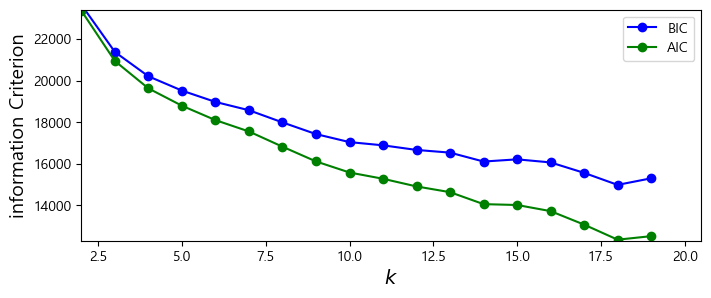

In [19]:
bic_aic(pca_6_df, 2, 20)

In [20]:
df_gmm = clustering_gmm(pca_6_df, 11, 42)
df_gmm

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,gmm_label
0,-0.688388,-0.214398,-0.750677,-0.132250,0.612789,1.013381,8
1,-0.616357,-0.113791,-1.348068,0.145664,0.872110,0.230503,8
2,-0.667383,-0.194276,-0.829908,-0.118874,0.602128,1.004823,8
3,-0.513890,-0.091935,-1.058357,-0.164113,1.119423,0.767000,8
4,-0.528817,-0.134833,-0.716385,-0.246943,0.998203,0.915198,8
...,...,...,...,...,...,...,...
1395,-1.112501,-1.491321,0.427284,1.196961,-0.508630,-0.528717,8
1396,-0.366192,-0.950736,-2.646691,1.228119,-0.537142,-1.041214,0
1397,-0.835812,-0.606046,-1.326809,0.325463,-0.047990,1.038422,8
1398,-0.731603,-0.672972,-1.820695,1.214873,-0.536083,-0.330721,0


In [21]:
df_gmm['gmm_label'].nunique()

11

In [22]:
df_gmm_robust_pca = df_similar.copy()
df_gmm_robust_pca['gmm_label']  = df_gmm['gmm_label'].values
df_gmm_robust_pca['gmm_label'].nunique()

11

In [24]:
get_clustering_folium(df_gmm_robust_pca,'X좌표','Y좌표','gmm_label')